In [ ]:
import pandas as pd
df=pd.read_csv("/content/crop_yield.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
print(df.shape)
print(df.head())
#Remove nan columns.
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
print(df.shape)
print(df.head())
df.isnull().sum()

(19689, 10)
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
(19689, 7)
   Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
1       1997   6637.0        4685           2051.4   6

Crop_Year          0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

<Axes: >

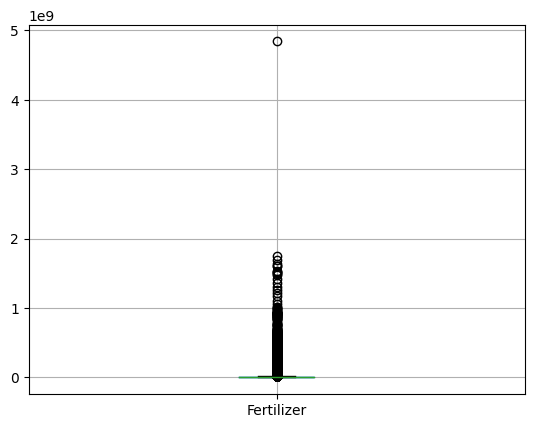

In [ ]:
#box plot for fertilier column
df.boxplot(column=['Fertilizer'])


In [ ]:
df_sortfert=df.sort_values('Fertilizer',ascending=True)
Q1=df_sortfert['Fertilizer'].quantile(0.25)
Q3=df_sortfert['Fertilizer'].quantile(0.75)
IQR=Q3-Q1
print("IQR: ",IQR)
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
print("lower bound: ",lb)
print("upper bound: ",ub)
#display outliers
print("\nFertilizer outliers: ")
df_outlier=df_sortfert[(df_sortfert['Fertilizer']<lb)|(df_sortfert['Fertilizer']>ub)]
df_outlier


IQR:  9815832.58
lower bound:  -14535734.250000002
upper bound:  24727596.07

Fertilizer outliers: 


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
1087,2002,261309.0,129784,1973.6,2.473812e+07,65327.25,0.472174
1161,2002,261416.0,24165390,315.9,2.474825e+07,65354.00,89.041852
13708,2014,163984.0,167820,605.6,2.475502e+07,54114.72,1.037813
10818,2008,173100.0,345090,1540.9,2.476022e+07,15579.00,1.964545
14802,2016,161583.0,111547,1205.6,2.476259e+07,56554.05,0.781579
...,...,...,...,...,...,...,...
11861,2010,9636540.0,30000632,742.6,1.600726e+09,2312769.60,3.077222
12415,2011,9731150.0,31892480,777.4,1.630162e+09,3211279.50,3.253333
17232,2019,9852504.0,36209665,814.5,1.692266e+09,3645426.48,3.688533
16922,2019,10216517.0,37507219,1446.7,1.754789e+09,3780111.29,3.519423


In [ ]:
#remove outliers
#display only non outliers
df_sortfert=df_sortfert[(df_sortfert['Fertilizer']>=lb)&(df_sortfert['Fertilizer']<=ub)]
#drop outliers
df_sortfert.drop(df_sortfert[(df_sortfert['Fertilizer']<lb)|(df_sortfert['Fertilizer']>ub)].index,inplace=True)


Index([], dtype='int64')
